# Visualizing NLU analysis of customer messages

## Default models vs. custom model

This notebook demonstrates visualizing the results from analyzing customer messages using Watson Natural Language Understanding.

Results from using the default NLU models are compared with results from using a custom language model.

- Import saved analysis results
- Example: Bar charts

## Import saved analysis results

In the [Exploring NLU](https://github.com/spackows/CASCON-2019_NLP-workshops/blob/master/notebooks/Notebook-1_Exploring-NLU.ipynb) notebook, we saved NLU results in a JSON file as a Project Asset.

In the [Normalizing custom model results](https://github.com/spackows/CASCON-2019_NLP-workshops/blob/master/notebooks/Notebook-4_Normalize-custom-model-results.ipynb) notebook, we saved normalized custom language results in a JSON file as a Project Asset too.

To import the saved data into this notebook, perform these steps for each asset:
1. Open the data panel by clicking on the **Find and Add Data** icon ( <img style="margin: 0px; padding: 0px; display: inline;" src="https://github.com/spackows/CASCON-2019_NLP-workshops/raw/master/images/find-add-data-icon.png"/> )
2. Click on the first empty cell below
3. In the data panel, under the file named <code>NLU-results.json</code> click **Insert to code** and then select "Insert Credentials"
4. Click on the second empty cell below
5. In the data panel, under the file named <code>NLU-results-custom-model-normalized.json</code> click **Insert to code** and then select "Insert Credentials"

In [4]:
# Define a helper function for copying files from  
# Project storage to the notebook working directory
#

from ibm_botocore.client import Config
import ibm_boto3

def copyToNotebookDir( credentials ):
    cos = ibm_boto3.client(
        service_name='s3',
        ibm_api_key_id=credentials['IBM_API_KEY_ID'],
        ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
        ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
        config=Config(signature_version='oauth'),
        endpoint_url=credentials['ENDPOINT'])
    cos.download_file(Bucket=credentials['BUCKET'],Key=credentials['FILE'],Filename=credentials['FILE'])
    print( "Done: '" + credentials['FILE'] + "'" )

In [5]:
copyToNotebookDir( credentials_1 )
copyToNotebookDir( credentials_2 )

Done: 'NLU-results.json'
Done: 'NLU-results-custom-model-normalized.json'


In [6]:
import json
with open( credentials_1['FILE'] ) as json_file:
    default_results_list = json.load(json_file)
default_results_list[0:3]

[{'header': '-------------------------------------------------------------',
  'message': 'Good morning can you help me upload a shapefile?',
  'actions': ['help'],
  'keywords': ['Good morning', 'shapefile'],
  'spacer': ''},
 {'header': '-------------------------------------------------------------',
  'message': 'Good night where to place my file to import it into notebook?',
  'actions': ['to place', 'to import'],
  'keywords': ['Good night', 'file', 'notebook'],
  'spacer': ''},
 {'header': '-------------------------------------------------------------',
  'message': 'hai how can i do analyze with csv file is there any tutorial on it',
  'actions': ['do', 'be'],
  'keywords': ['csv file', 'hai', 'tutorial'],
  'spacer': ''}]

In [7]:
with open( credentials_2['FILE'] ) as json_file:
    custom_results_list = json.load(json_file)
custom_results_list[0:3]

[{'header': '-------------------------------------------------------------',
  'message': 'Good morning can you help me upload a shapefile?',
  'actions': ['load'],
  'objects': ['shapefile'],
  'tech': [],
  'docs': [],
  'persona': [],
  'spacer': ''},
 {'header': '-------------------------------------------------------------',
  'message': 'Good night where to place my file to import it into notebook?',
  'actions': ['import'],
  'objects': ['notebook'],
  'tech': [],
  'docs': [],
  'persona': [],
  'spacer': ''},
 {'header': '-------------------------------------------------------------',
  'message': 'hai how can i do analyze with csv file is there any tutorial on it',
  'actions': ['analyze'],
  'objects': [],
  'tech': [],
  'docs': ['tutorial'],
  'persona': [],
  'spacer': ''}]

## Example: Bar charts

Count the important words, and then plot bar charts to show the most common words.

In [14]:
# Define a helper function for counting words
#
from collections import OrderedDict
def countWords( results_list, entity_type, minimum ):
    all_words = {}
    for result in results_list:
        words_arr = result[entity_type]
        for word in words_arr:
            if( word not in all_words ):
                all_words[word] = 0
            all_words[word] += 1
    common_words = dict( [ (k,v) for k,v in all_words.items() if v > minimum ] )
    ordered_common_words = OrderedDict( sorted( common_words.items(), key=lambda x:x[1], reverse=True ) )
    return ordered_common_words

In [15]:
# Count the words
#
default_actions  = countWords( default_results_list, "actions",  3 )
default_keywords = countWords( default_results_list, "keywords", 3 )
custom_actions   = countWords( custom_results_list,  "actions",  2 )
custom_objects   = countWords( custom_results_list,  "objects",  1 )
custom_tech      = countWords( custom_results_list,  "tech",     1 )

In [16]:
# Create some structures to make it easier to plot the charts
#
import random
from matplotlib import colors as mcolors
import numpy as np

def random_colours( num ):
    rand_indexes = random.sample(range(0, len( mcolors.CSS4_COLORS.keys() ) - 1 ), num )
    colour_list = [ list( mcolors.CSS4_COLORS.keys() )[i] for i in rand_indexes ]
    return colour_list

values_default_action      = list( default_actions.values() )[0:6]
labels_default_action      = list( default_actions.keys() )[0:6]
num_bars_default_action    = len( labels_default_action )
positions_default_action   = np.arange( num_bars_default_action )
colours_default_action     = random_colours( num_bars_default_action )

values_default_keywords    = list( default_keywords.values() )[0:6]
labels_default_keywords    = list( default_keywords.keys() )[0:6]
num_bars_default_keywords  = len( labels_default_keywords )
positions_default_keywords = np.arange( num_bars_default_keywords )
colours_default_keywords   = random_colours( num_bars_default_keywords )

values_custom_action       = list( custom_actions.values() )[0:6]
labels_custom_action       = list( custom_actions.keys() )[0:6]
num_bars_custom_action     = len( labels_custom_action )
positions_custom_action    = np.arange( num_bars_custom_action )
colours_custom_action      = random_colours( num_bars_custom_action )

values_custom_obj          = list( custom_objects.values() )[0:6]
labels_custom_obj          = list( custom_objects.keys() )[0:6]
num_bars_custom_obj        = len( labels_custom_obj )
positions_custom_obj       = np.arange( num_bars_custom_obj )
colours_custom_obj         = random_colours( num_bars_custom_obj )

values_custom_tech         = list( custom_tech.values() )[0:6]
labels_custom_tech         = list( custom_tech.keys() )[0:6]
num_bars_custom_tech       = len( labels_custom_tech )
positions_custom_tech      = np.arange( num_bars_custom_tech )
colours_custom_tech        = random_colours( num_bars_custom_tech )

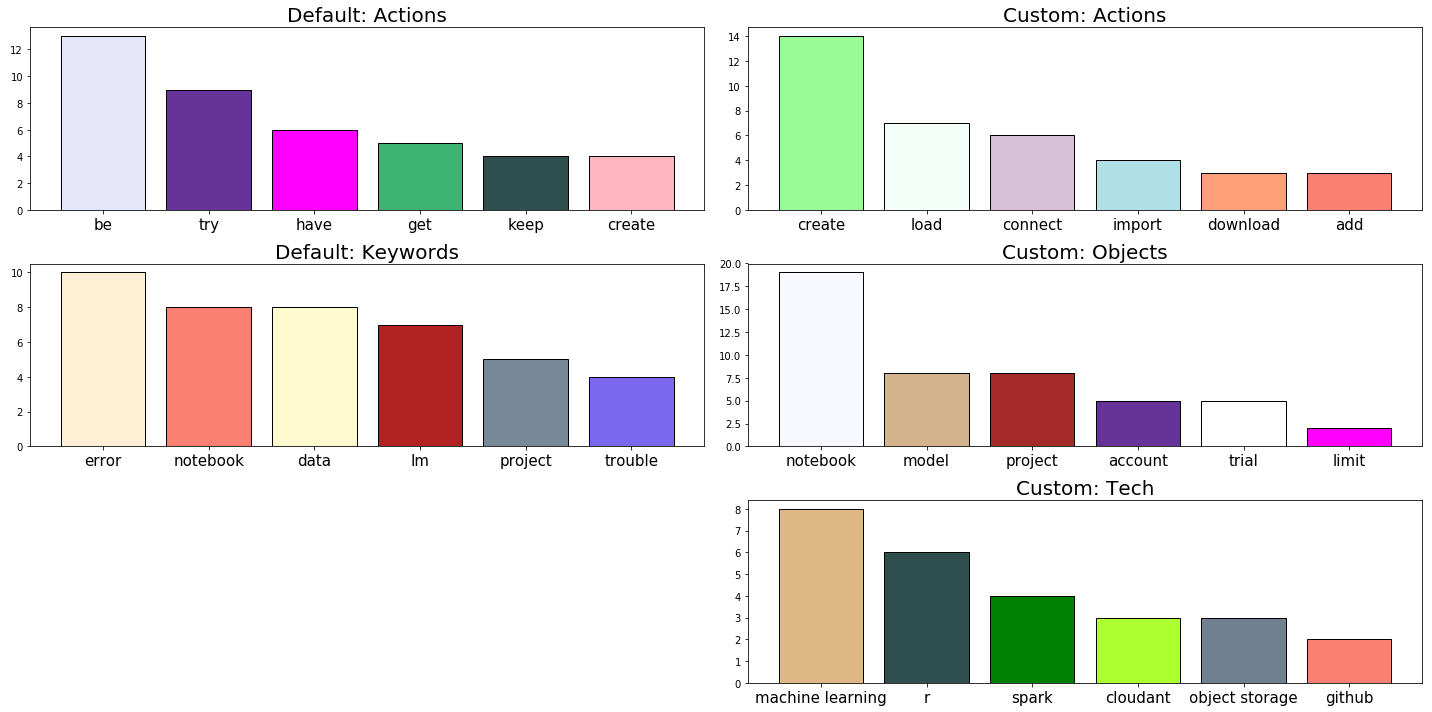

In [18]:
# Plot results side by side
#
import matplotlib.pyplot as plt
fig, axs = plt.subplots( 3, 2, figsize=( 20, 10 ) )
axs[0,0].bar( positions_default_action,   values_default_action,   color=colours_default_action,   edgecolor="black" )
axs[1,0].bar( positions_default_keywords, values_default_keywords, color=colours_default_keywords, edgecolor="black" )
axs[0,1].bar( positions_custom_action,    values_custom_action,    color=colours_custom_action,    edgecolor="black" )
axs[1,1].bar( positions_custom_obj,       values_custom_obj,       color=colours_custom_obj,       edgecolor="black" )
axs[2,1].bar( positions_custom_tech,      values_custom_tech,      color=colours_custom_tech,      edgecolor="black" )
axs[0,0].set_title( 'Default: Actions',  fontsize=20 )
axs[1,0].set_title( 'Default: Keywords', fontsize=20  )
axs[0,1].set_title( 'Custom: Actions',   fontsize=20  )
axs[1,1].set_title( 'Custom: Objects',   fontsize=20  )
axs[2,1].set_title( 'Custom: Tech',      fontsize=20  )
plt.sca(axs[0,0])
plt.xticks( positions_default_action,   labels_default_action,   fontsize=15 )
plt.sca(axs[1,0])
plt.xticks( positions_default_keywords, labels_default_keywords, fontsize=15 )
plt.sca(axs[0,1])
plt.xticks( positions_custom_action,    labels_custom_action,    fontsize=15 )
plt.sca(axs[1,1])
plt.xticks( positions_custom_obj,       labels_custom_obj,       fontsize=15 )
plt.sca(axs[2,1])
plt.xticks( positions_custom_tech,      labels_custom_tech,      fontsize=15 )
axs[2,0].axis('off')
fig.tight_layout()
plt.show()

Copyright © 2019 IBM. This notebook and its source code are released under the terms of the MIT License.